In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

df = pd.read_csv("/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv")

import warnings
warnings.filterwarnings("ignore")

In [2]:
price = df[['Date','Close']]
price.Date = pd.to_datetime(price.Date, format="%Y-%m-%d")
price=price[(price['Date'] >pd.Timestamp(2019,1,1))]
price.head()

,Date,Close
4730,2019-01-02,2128.50
4731,2019-01-03,2111.80
4732,2019-01-04,2117.45
4733,2019-01-07,2120.65
4734,2019-01-08,2103.00


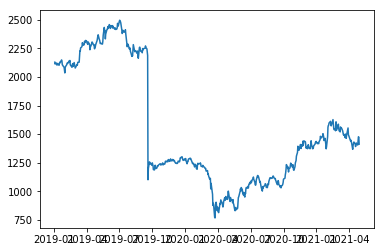

<Figure size 1008x504 with 0 Axes>

In [3]:
plt.plot(price.Date, price.Close)
plt.figure(figsize=(14,7))
plt.gcf().autofmt_xdate() 
plt.show()

Stock splits happened in 2011-07-14(1:5 ratio) and 2019-09-19(1:2 ratio). So, normalizing the time series.


<Figure size 4320x8640 with 0 Axes>

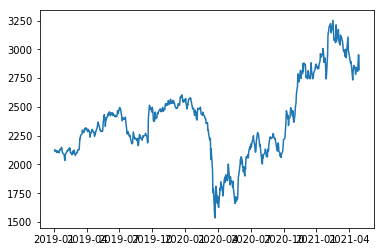

<Figure size 4320x8640 with 0 Axes>

In [4]:
#price.Close = price.Close.mask( price.Date >='2011-07-14', price.Close*5)
price.Close = price.Close.mask( price.Date >='2019-09-19', price.Close*2)

plt.plot(price.Date, price.Close)
plt.figure(figsize=(60,120))



In [5]:
#price.sort_values(by='Date', ascending=False, inplace=True)
price.head()

,Date,Close
4730,2019-01-02,2128.50
4731,2019-01-03,2111.80
4732,2019-01-04,2117.45
4733,2019-01-07,2120.65
4734,2019-01-08,2103.00


* Highest Profit that could have been made

In [6]:
price['lowest_cumulative_price']=price.Close.cummin()
price['highest_profit']=price.Close-price['lowest_cumulative_price']
price.highest_profit.max()

1717.9

* Biggest Loss that could have been made

In [7]:
price['highest_cumulative_price']=price.Close.cummax()
price['highest_loss']=price.Close-price['highest_cumulative_price']
price.highest_loss.min()

-1069.4